In [11]:
!git clone https://github.com/PushpakBhoge512/Assignment

fatal: destination path 'Assignment' already exists and is not an empty directory.


In [12]:
import numpy as np
import pandas as pd
from PIL import Image
import random as rng
from google.colab.patches import cv2_imshow
import cv2
import os
import json
import sys

In [13]:
dir = 'Assignment/Data Visualization'
data_dir = os.path.join(dir, 'data')
images_dir = os.path.join(dir, 'images')
data_list = os.listdir(data_dir)
images_list = os.listdir(images_dir)
data_list.sort()
images_list.sort()

In [14]:
meta_data_json_path = list()
image_path = list()
for i in range(len(data_list)):  
  meta_data_json_path.append(data_dir + '/' + data_list[i])
  image_path.append(images_dir + '/' + images_list[i]) 

In [15]:
def polygon(image_path, data_path):
  with open(data_path) as f:
    data = json.load(f)
# Reading an image in default
# mode
  image = cv2.imread(image_path)
  height, width = image.shape[:2]

  
# Window name in which image is
# displayed

  
# Polygon corner points coordinates

#pts = np.array(data[1]['value']['points'])

  pts = list()
  start = list()
  end = list()
  label = list()
  top = list()
  bottom = list()
  num=0

  for d in data:
    if(d['type'] == 'polygonlabels'):
      num = num+1
      x_min = sys.maxsize
      y_max = -sys.maxsize + 1
      x_max = -sys.maxsize + 1
      y_min = sys.maxsize

      label.append(d['value']['polygonlabels'][0])

      curr_pts = np.array(d['value']['points'])
      for c in curr_pts:
        c[0] = int((c[0]*width)/100)
        c[1] = int((c[1]*height)/100)

        x_min = min(c[0], x_min)
        y_max = max(c[1], y_max)
        x_max = max(c[0], x_max)
        y_min = min(c[1], y_min)

      pts.append(curr_pts)
      start.append((int(x_min), int(y_max)))
      end.append((int(x_max), int(y_min)))
      top.append((int(x_min), int(y_min)))
  
  for p in pts:
    p = p.reshape((-1, 1, 2))
  
  isClosed = True
  
  # Green color in BGR
  color = (0,128,0)
  
  # Line thickness of 2 px
  thickness = 2
  
   #Using cv2.polylines() method
   #Draw a Green polygon with 
   #thickness of 1 px
  alpha = 0.2 # Transparency (0-transparent, 1-opaque)
  overlay = image.copy()

  for p in pts:
    image = cv2.polylines(image, np.int32([p]), 
                        isClosed, color, 3)
    cv2.fillPoly(overlay, np.int32([p]), color)
    image_new = cv2.addWeighted(overlay, alpha, image, 1-alpha, 0)

  
  #Displaying the image
  cv2_imshow(image_new)
          
  cv2.destroyAllWindows()

In [16]:
def bb(image_path, data_path):
  with open(data_path) as f:
    data = json.load(f)
# Reading an image in default
# mode
  image = cv2.imread(image_path)
  height, width = image.shape[:2]

  
# Window name in which image is displayed

  
# Polygon corner points coordinates

#pts = np.array(data[1]['value']['points'])

  pts = list()
  start = list()
  end = list()
  label = list()
  top = list()
  bottom = list()
  num = 0

  for d in data:
    if(d['type'] == 'polygonlabels'):
      num = num+1
      x_min = sys.maxsize
      y_max = -sys.maxsize + 1
      x_max = -sys.maxsize + 1
      y_min = sys.maxsize

      label.append(d['value']['polygonlabels'][0])

      curr_pts = np.array(d['value']['points'])
      for c in curr_pts:
        c[0] = int((c[0]*width)/100)
        c[1] = int((c[1]*height)/100)

        x_min = min(c[0], x_min)
        y_max = max(c[1], y_max)
        x_max = max(c[0], x_max)
        y_min = min(c[1], y_min)

      pts.append(curr_pts)
      start.append((int(x_min), int(y_max)))
      end.append((int(x_max), int(y_min)))
      top.append((int(x_min), int(y_min)))
  
  for p in pts:
    p = p.reshape((-1, 1, 2))
  
  isClosed = True
  
  # Green color in BGR
  color = (0, 128, 0)
  
  # Line thickness of 2 px
  thickness = 2
  
   #Using cv2.polylines() method
   #Draw a Blue polygon with 
   #thickness of 1 px

    
  for i in range(num):    
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.rectangle(image, start[i], end[i], color, 2)
    bottom.append((top[i][0] + 10*len(label[i]), top[i][1]))
    cv2.rectangle(image, (top[i][0], top[i][1] - 15), bottom[i], (0,0,0), -1)
    cv2.putText(image, label[i], top[i], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

  
  #Displaying the image
  cv2_imshow(image)
          
  #cv2.destroyAllWindows()

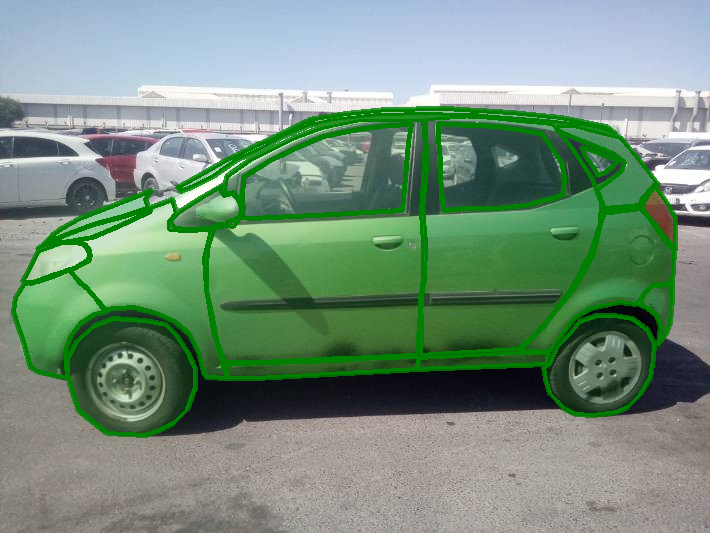

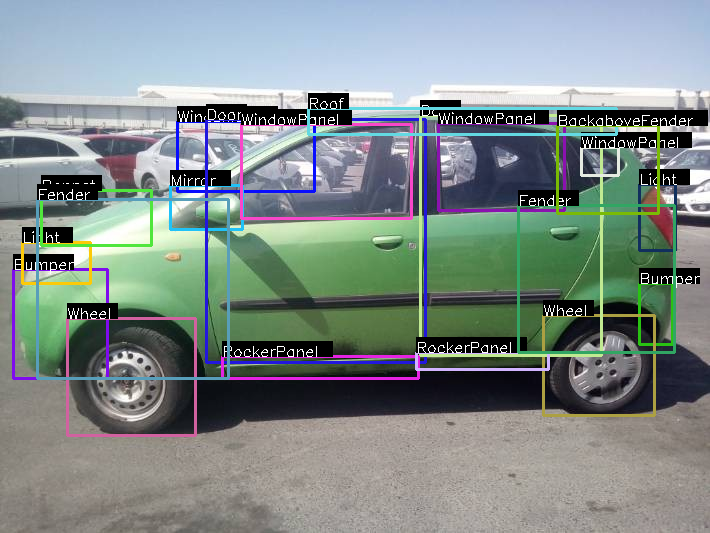

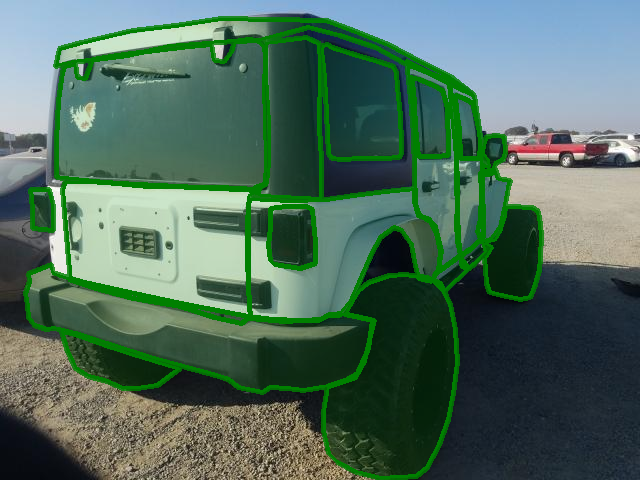

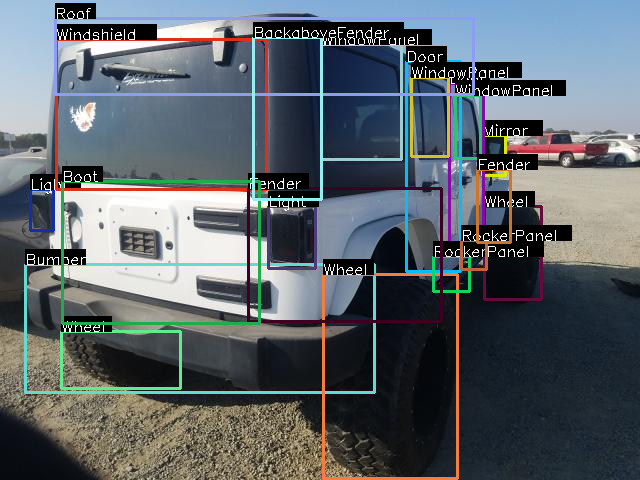

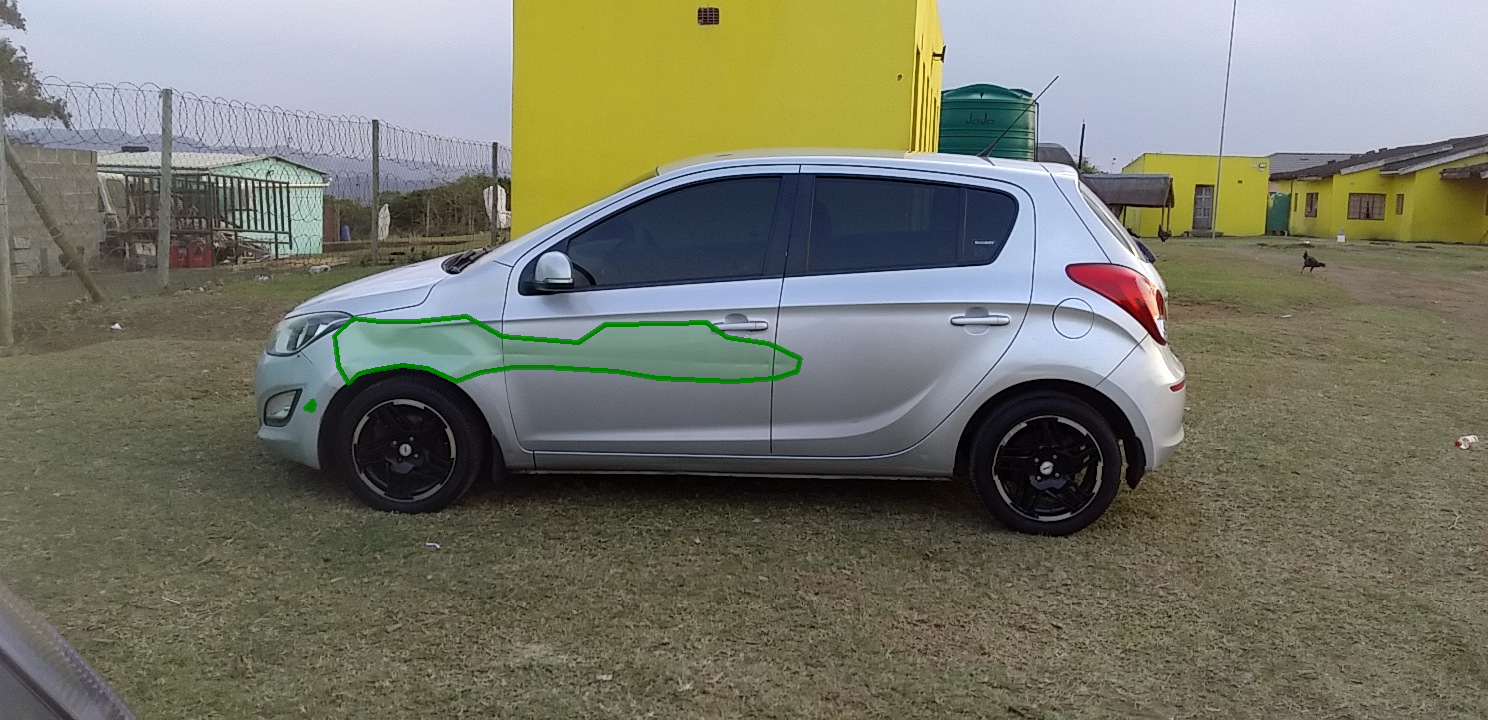

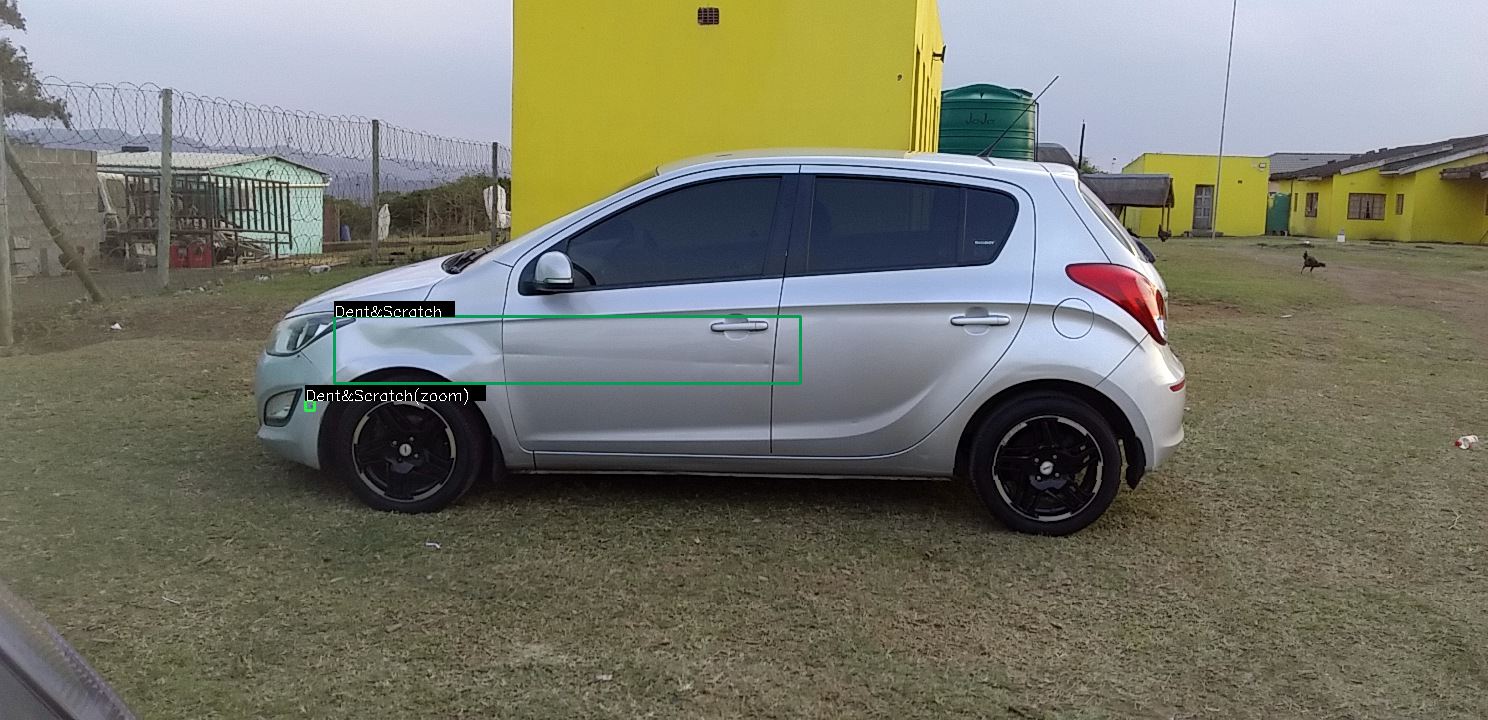

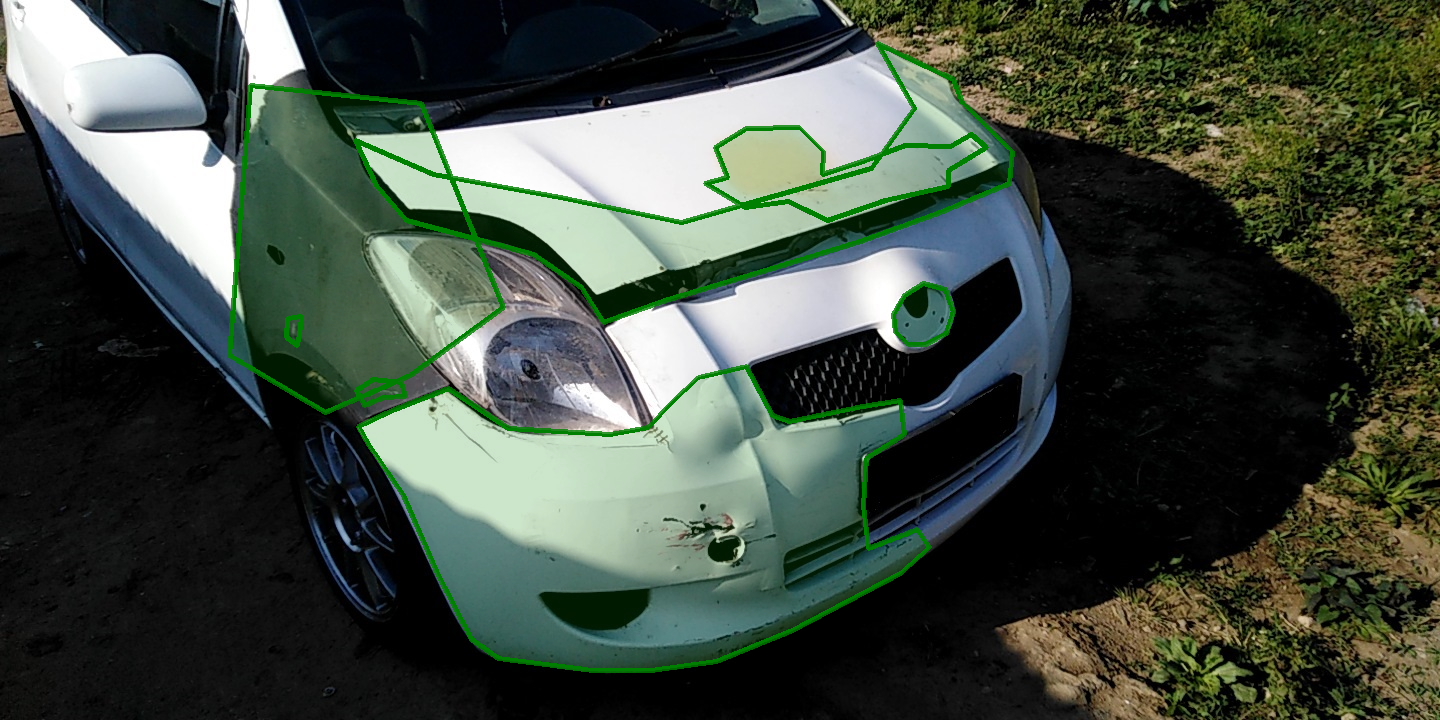

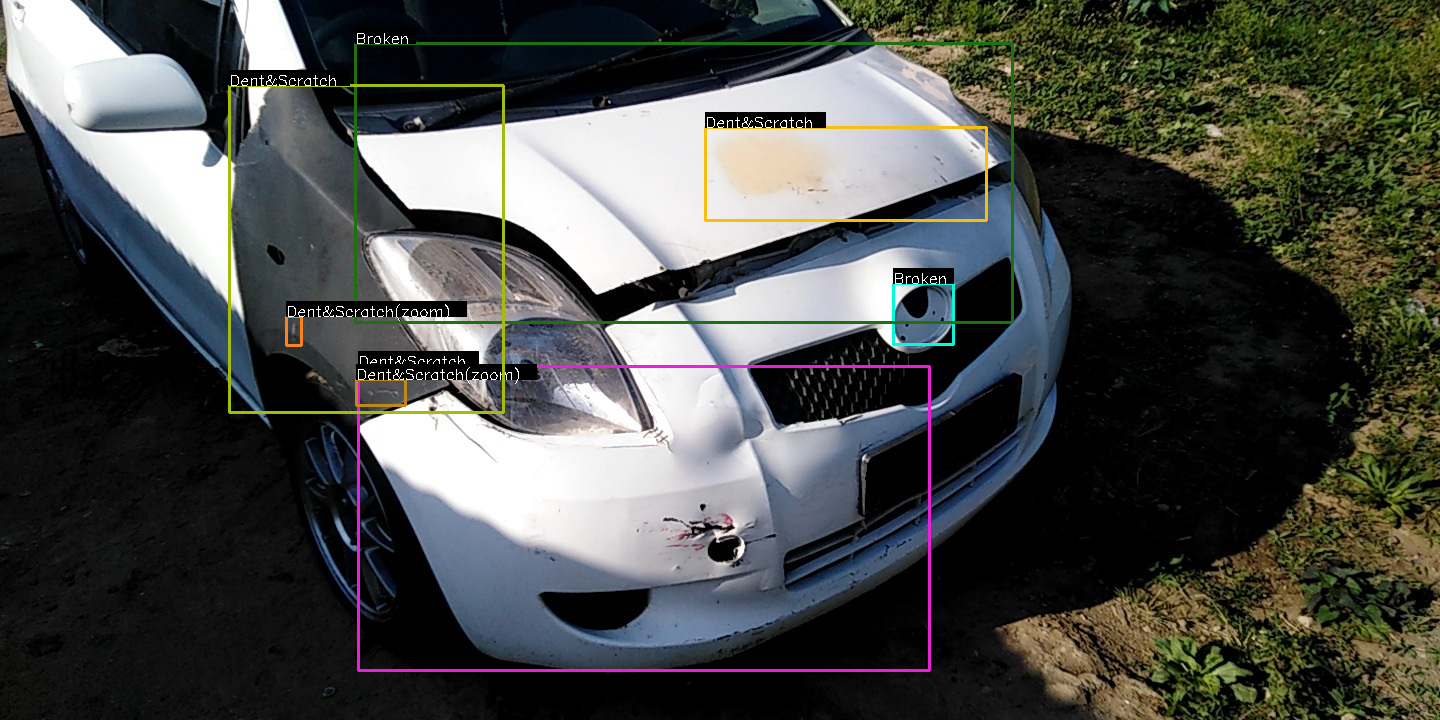

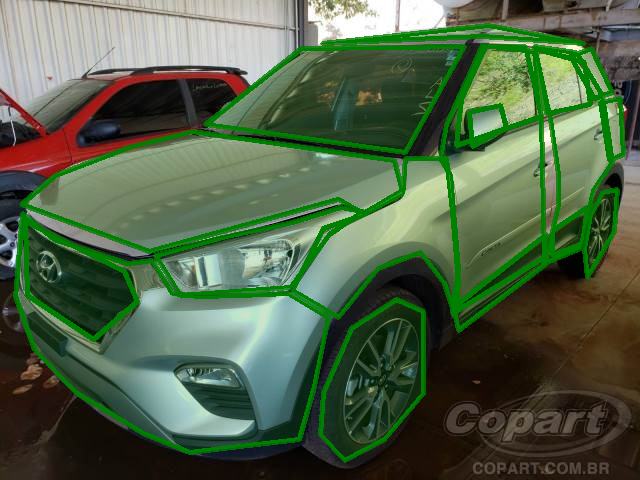

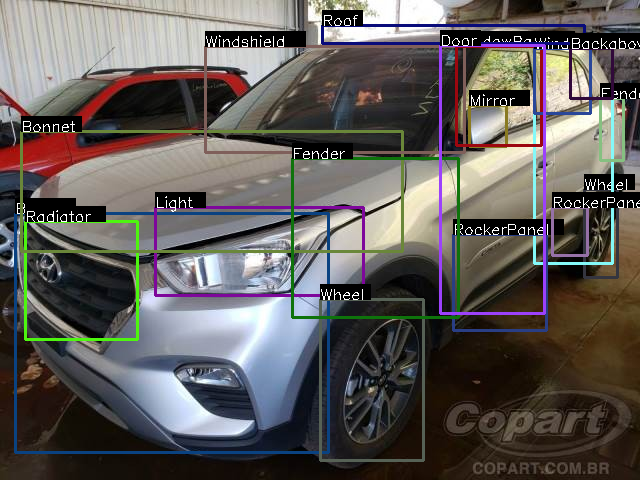

In [17]:
for i in range(len(data_list)):
  polygon(image_path[i], meta_data_json_path[i])
  bb(image_path[i], meta_data_json_path[i])